#### <font color="black"> <left> Fecha de Actualización:8/8/2023

# <font color="navy"> <center> Quantitative Asset Allocation

In [1]:
from functions import download_data, asset_allocation, backtesting
from visualizations import plot_backtesting

In [2]:
USA, MX="SPLG, ACWI, IXJ", "IUITN.MX"
benchmark="^GSPC"
start_date, end_date ="2023-01-01", "2023-07-30"

In [3]:
data_opt, data_benchmark_opt = download_data(tickers_USA=USA, tickers_MX=MX,benchmark=benchmark, 
                                    start_date=start_date, end_date=end_date).download()

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
data_opt

,ACWI,IXJ,SPLG,IUITN.MX
Date,,,,
2023-01-03,1635.354631,1639.856349,864.505544,300.239990
2023-01-04,1651.800131,1640.549166,868.970155,300.239990
2023-01-05,1633.141836,1622.052909,858.037065,300.239990
2023-01-06,1665.065292,1634.555507,874.374422,300.239990
2023-01-09,1651.919921,1597.053555,865.203062,305.160004
...,...,...,...,...
2023-07-24,1669.252638,1469.295400,906.597381,381.390015
2023-07-25,1660.063028,1457.140182,901.205907,385.109985
2023-07-26,1672.188767,1462.466957,906.424804,381.779999


In [5]:
data_benchmark_opt

,Adj Close
Date,
2023-01-03,3824.139893
2023-01-04,3852.969971
2023-01-05,3808.100098
2023-01-06,3895.080078
2023-01-09,3892.090088
...,...
2023-07-24,4554.640137
2023-07-25,4567.459961
2023-07-26,4566.750000


In [6]:
AA=asset_allocation(data_opt, data_benchmark_opt, .05)

In [7]:
weights_summary=AA.summary(20000)

In [8]:
weights_summary

Stocks,ACWI,IXJ,SPLG,IUITN.MX
Min Var,0.107691,0.628407,0.011770,0.252133
Max Sharpe,0.034747,0.010947,0.083781,0.870526
Semivariance,0.030948,0.010666,0.789293,0.169094
Omega,0.029172,0.016486,0.053942,0.900399


In [9]:
data_backtesting, data_benchmark_backtesting = download_data(tickers_USA=USA, tickers_MX=MX,benchmark=benchmark, 
                                    start_date=start_date, end_date=end_date).download()

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
BT=backtesting(weights_summary=weights_summary, data_stocks=data_backtesting,
               data_benchmark=data_benchmark_backtesting, cap_inicial=1000000)

In [11]:
evol=BT.history
evol.tail(5)

,Min Var,Max Sharpe,Semivariance,Omega,Benchmark
Date,,,,,
2023-07-24,"998,140.4309","1,238,431.6974","1,079,677.7449","1,244,200.1325","1,182,111.5065"
2023-07-25,"994,744.4432","1,247,980.9662","1,076,111.3615","1,254,358.3621","1,185,438.7643"
2023-07-26,"995,711.1780","1,239,559.2096","1,079,741.8668","1,245,327.1297","1,185,254.5010"
2023-07-27,"992,221.4938","1,250,418.2787","1,072,947.4786","1,257,047.2223","1,177,639.6366"
2023-07-28,"994,516.5445","1,251,767.5852","1,080,624.4135","1,258,024.6939","1,189,272.1758"


In [12]:
BT.metrics(rf=0.05)

,Annualized Return,Annualized Vol,Sharpe Ratio
Min Var,-0.0000,0.1410,-0.3549
Max Sharpe,0.4305,0.2423,1.5703
Semivariance,0.1517,0.1629,0.6244
Omega,0.4410,0.2491,1.5698
Benchmark,0.3195,0.1385,1.9453


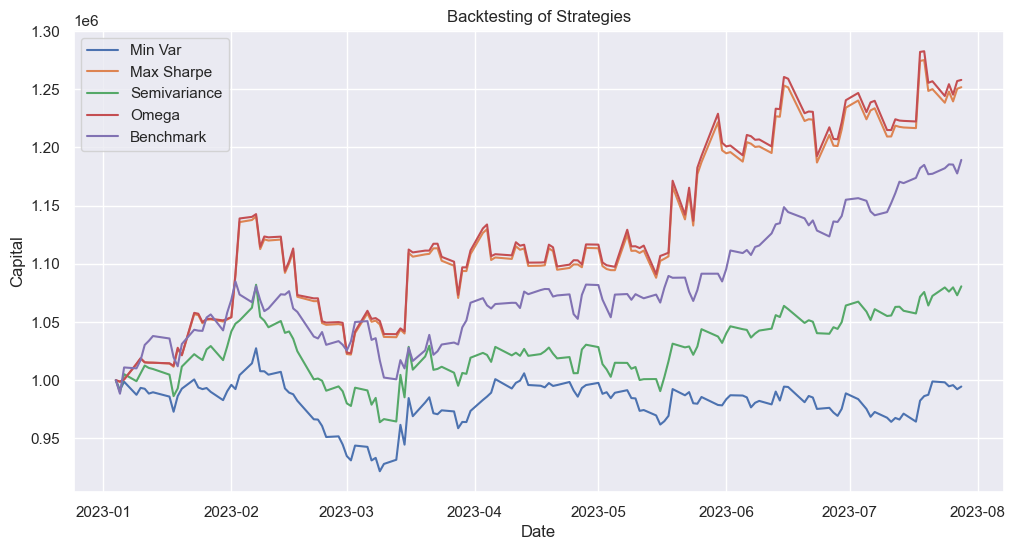

In [13]:
plot_backtesting(evol)